# Analysis

This notebook can be used to browse and play with the results of the 12 multilingual CLIP models that we tested on Babel-ImageNet and three retrieval datasets.

If you have questions about the data, evaluation setup, or models, please look into our paper, open an issue, or mail me.

For analysis, we mostly focus here on the models added since writing our paper (that is SigLIP and NLLB-CLIP) so take a look at the paper for the other models.


In [17]:
import json
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option("display.precision", 2)

# Babel-ImageNet

In [18]:
# Some data prep for the languages
xlmr_languages = ['NE', 'ID', 'DE', 'NL', 'AF', 'HE', 'SQ', 'UZ', 'KN', 'KU', 'TA', 'LV', 'KO', 'UG', 'BR', 'EL', 'SU', 'KK', 'SK', 'GL', 'OM', 'FA', 'JV', 'CS', 'LO', 'HY', 'XH', 'HR', 'SO', 'GU', 'AM', 'AR', 'SA', 'CA', 'IS', 'IT', 'SV', 'GA', 'BG', 'VI', 'SD', 'UR', 'KM', 'PL', 'HU', 'SR', 'FR', 'HI', 'FY', 'ET', 'BS', 'SW', 'AZ', 'MK', 'ES', 'MN', 'JA', 'TL', 'TR', 'GD', 'RO', 'MG', 'MR', 'SL', 'PT', 'LT', 'NO', 'YI', 'UK', 'KY', 'KA', 'BN', 'OR', 'MY', 'EN', 'PS', 'FI', 'ZH', 'DA', 'ML', 'BE', 'EO', 'HA', 'EU', 'AS', 'TE', 'TH', 'CY', 'SI', 'RU', 'LA', 'PA', 'MS']

babel_imagenet = json.load(open("../data/babel_imagenet-298.json", encoding="utf-8"))
lang2classes = {lang: len(v[0]) for lang, v in babel_imagenet.items()}
lang2full_name = json.load(open("../data/language_mapping.json", encoding="utf-8"))

# for sorting languages in dataframe: XLMR languages, then all others
sorted_languages = sorted([l for l in xlmr_languages if l != "EN"]) + sorted([l for l in babel_imagenet.keys() if l not in xlmr_languages])
sorted_class_languages = sorted([l for l in xlmr_languages if l != "EN"], key=lambda l: lang2classes[l]) + sorted([l for l in babel_imagenet.keys() if l not in xlmr_languages], key=lambda l: lang2classes[l])

In [19]:
# Loading the results
results = []

for file in os.listdir("../results/babel-imagenet"):
    res = json.load(open(f"../results/babel-imagenet/{file}"))
    entry = dict(model=res["meta"]["model"], source=res["meta"]["source"], parameters=res["meta"]["parameters"])
    prompt_results = dict()
    label_results = dict()
    for lang_res in res["results"]:
        if lang_res["prompt"] == "nllb_dist13b_prompts":
            prompt_results[lang_res["lang"]] = lang_res["accuracy"] * 100
        elif lang_res["prompt"] == "label":
            label_results[lang_res["lang"]] = lang_res["accuracy"] * 100
    # adding label results as "fallback" for languages where we did not have prompts
    prompt_results.update({k:v for k,v in label_results.items() if k not in prompt_results})
    entry.update(prompt_results)
    results.append(entry)
    
results = pd.DataFrame.from_dict(results)
results = results[["model", "source", "parameters", "EN"]+sorted_languages]
results

,model,source,parameters,EN,AF,AM,AR,AS,AZ,BE,...,XAL,XMF,YO,YUA,ZA,ZDJ,ZH_CLASSICAL,ZH_MIN_NAN,ZH_YUE,ZU
0,nllb-clip-base-siglip@v1,nllb-openclip,507474178,39.75,41.11,50.12,29.52,39.94,34.77,36.72,...,6.36,30.04,31.16,10.00,3.41,10.62,51.78,11.21,26.19,46.53
1,nllb-clip-base@v1,nllb-openclip,501885185,24.29,28.07,43.39,18.77,32.22,24.21,25.90,...,2.62,25.18,25.48,15.33,3.46,11.62,44.44,10.30,18.40,38.20
2,ViT-B-16-SigLIP-i18n-256@webli,openclip,370626050,75.12,47.17,14.56,42.27,23.14,47.82,32.05,...,4.72,32.27,5.74,6.50,3.07,9.25,75.56,20.81,65.46,6.45
3,xlm-roberta-large-ViT-H-14@frozen_laion5b_s13b...,openclip,1193014785,76.95,47.53,2.56,31.70,9.53,36.98,40.12,...,2.82,19.49,7.10,4.00,4.00,4.50,74.22,22.37,61.60,8.98
4,BAAI/AltCLIP-m9,altclip,864186113,73.36,22.60,7.13,42.44,6.53,16.40,27.52,...,3.08,14.55,4.58,2.33,3.76,4.38,76.67,22.39,55.50,7.10
5,nllb-clip-large-siglip@v1,nllb-openclip,1195496514,51.96,53.89,55.79,40.10,49.22,44.24,48.40,...,9.69,33.02,32.32,4.00,1.37,13.75,55.19,14.95,34.56,54.53
6,M-CLIP/XLM-Roberta-Large-Vit-B-16Plus,m-clip,768923777,47.02,50.33,27.22,32.06,21.69,26.57,35.35,...,4.00,24.43,5.03,10.67,1.32,12.00,63.04,16.90,38.15,8.61
7,M-CLIP/XLM-Roberta-Large-Vit-L-14,m-clip,988294145,52.34,55.32,29.11,36.30,24.92,28.81,36.85,...,2.87,17.10,4.77,7.00,0.88,19.38,70.00,16.15,36.73,5.59
8,xlm-roberta-base-ViT-B-32@laion5b_s13b_b90k,openclip,366121473,62.32,36.48,1.04,24.51,5.43,25.83,27.18,...,1.85,11.96,2.19,3.00,2.68,3.75,70.44,19.45,49.68,8.65
9,M-CLIP/XLM-Roberta-Large-Vit-B-32,m-clip,711692545,44.06,47.48,29.25,30.68,22.84,25.69,32.66,...,2.92,6.24,4.45,12.67,1.27,18.25,62.59,13.75,22.17,5.84


## Grouping Languages

We focus on the languages used in training XLM-R for evaluation and group those into low-, mid-, and high-res based on the number of classes.

We can also use all 298 languages with >=10 classes but consider those results with caution as this language list is not curated and contains *unusual* languages
like local dialects (e.g. the German Bavarian) or extinct languages like Ancient Greek.   
We have a lot more low-res languages here so we subdivide this group more.


In [20]:
# grouping results
num_groups = 3
xlmr_group_names = ["xlmr-low", "xlmr-mid", "xlmr-high"]
groups_xlmr = [[] for _ in range(num_groups)]
for lang, count in lang2classes.items():
    if lang == "EN" or lang not in xlmr_languages:
        continue
    for i in range(1, num_groups+1):
        limit = i * 1000//num_groups
        if count <= limit:
            groups_xlmr[i-1].append(lang)
            break
print("XLMR Languages")
print([len(g) for g in groups_xlmr])
for g, n in zip(groups_xlmr, xlmr_group_names):
    print("### ",n, ": ", [lang2full_name[l] for l in sorted(g)])
    
    
num_groups = 5
groups_all = [[] for _ in range(num_groups)]
limits = [33, 111, 333, 666, 1000]
all_group_names = ["super low", "very low", "low", "mid", "high"]
for lang, count in lang2classes.items():
    if lang == "EN":
        continue
    for i in range(num_groups):
        limit = limits[i]
        if count <= limit:
            groups_all[i].append(lang)
            break
print("ALL Languages")
print([len(g) for g in groups_all])
for g, n in zip(groups_all, all_group_names):
    print("### ",n, ": ", [lang2full_name[l] for l in sorted(g)])

for name, group in zip(xlmr_group_names+all_group_names, groups_xlmr+groups_all):
    results[name] = results[group].mean(axis=1)
results = results[["model", "source", "parameters", "EN"]+xlmr_group_names+all_group_names+sorted_languages]
results

XLMR Languages
[41, 35, 16]
###  xlmr-low :  ['Afrikaans', 'Amharic', 'Assamese', 'Bengali', 'Breton', 'Bosnian', 'West Frisian', 'Scottish Gaelic', 'Gujarati', 'Hausa', 'Javanese', 'Khmer', 'Kannada', 'Kurdish', 'Kirghiz', 'Latin', 'Lao', 'Malagasy', 'Malayalam', 'Mongolian', 'Marathi', 'Burmese', 'Nepali', 'Oromo', 'Oriya', 'Punjabi', 'Pashto', 'Sanskrit', 'Sindhi', 'Sinhalese', 'Somali', 'Albanian', 'Sundanese', 'Swahili', 'Telugu', 'Tagalog', 'Uyghur', 'Urdu', 'Uzbek', 'Xhosa', 'Yiddish']
###  xlmr-mid :  ['Arabic', 'Azerbaijani', 'Belarusian', 'Bulgarian', 'Czech', 'Welsh', 'Danish', 'Greek', 'Esperanto', 'Estonian', 'Basque', 'Irish', 'Galician', 'Hebrew', 'Hindi', 'Croatian', 'Hungarian', 'Armenian', 'Indonesian', 'Icelandic', 'Georgian', 'Kazakh', 'Korean', 'Lithuanian', 'Latvian', 'Macedonian', 'Malay', 'Norwegian (Bokmål)', 'Slovak', 'Slovenian', 'Serbian', 'Tamil', 'Turkish', 'Ukrainian', 'Vietnamese']
###  xlmr-high :  ['Catalan', 'German', 'Spanish', 'Persian', 'Finnish', 

,model,source,parameters,EN,xlmr-low,xlmr-mid,xlmr-high,super low,very low,low,...,XAL,XMF,YO,YUA,ZA,ZDJ,ZH_CLASSICAL,ZH_MIN_NAN,ZH_YUE,ZU
0,nllb-clip-base-siglip@v1,nllb-openclip,507474178,39.75,38.29,32.17,29.37,27.08,24.89,31.56,...,6.36,30.04,31.16,10.00,3.41,10.62,51.78,11.21,26.19,46.53
1,nllb-clip-base@v1,nllb-openclip,501885185,24.29,29.06,21.18,18.69,23.66,20.16,23.52,...,2.62,25.18,25.48,15.33,3.46,11.62,44.44,10.30,18.40,38.20
2,ViT-B-16-SigLIP-i18n-256@webli,openclip,370626050,75.12,25.00,48.20,56.66,23.29,22.94,29.25,...,4.72,32.27,5.74,6.50,3.07,9.25,75.56,20.81,65.46,6.45
3,xlm-roberta-large-ViT-H-14@frozen_laion5b_s13b...,openclip,1193014785,76.95,19.31,41.03,52.23,24.40,24.44,27.22,...,2.82,19.49,7.10,4.00,4.00,4.50,74.22,22.37,61.60,8.98
4,BAAI/AltCLIP-m9,altclip,864186113,73.36,14.19,21.32,33.97,19.83,18.45,20.55,...,3.08,14.55,4.58,2.33,3.76,4.38,76.67,22.39,55.50,7.10
5,nllb-clip-large-siglip@v1,nllb-openclip,1195496514,51.96,46.99,42.78,39.75,29.65,31.17,40.31,...,9.69,33.02,32.32,4.00,1.37,13.75,55.19,14.95,34.56,54.53
6,M-CLIP/XLM-Roberta-Large-Vit-B-16Plus,m-clip,768923777,47.02,25.73,34.98,36.46,19.06,18.55,24.50,...,4.00,24.43,5.03,10.67,1.32,12.00,63.04,16.90,38.15,8.61
7,M-CLIP/XLM-Roberta-Large-Vit-L-14,m-clip,988294145,52.34,27.91,38.17,40.07,19.63,18.29,24.52,...,2.87,17.10,4.77,7.00,0.88,19.38,70.00,16.15,36.73,5.59
8,xlm-roberta-base-ViT-B-32@laion5b_s13b_b90k,openclip,366121473,62.32,14.96,30.86,39.52,21.60,19.95,21.50,...,1.85,11.96,2.19,3.00,2.68,3.75,70.44,19.45,49.68,8.65
9,M-CLIP/XLM-Roberta-Large-Vit-B-32,m-clip,711692545,44.06,25.51,33.47,34.11,18.17,16.28,20.84,...,2.92,6.24,4.45,12.67,1.27,18.25,62.59,13.75,22.17,5.84


In [21]:
# let's turn those unreadable ISO codes into their full language name
results_fulllang = results.rename(columns=lang2full_name)
results_fulllang

,model,source,parameters,English,xlmr-low,xlmr-mid,xlmr-high,super low,very low,low,...,Kalmyk,Mingrelian,Yoruba,Yucatec Maya,Zhuang,Ngazidja Comorian,Classical Chinese,Min Nan,Cantonese,Zulu
0,nllb-clip-base-siglip@v1,nllb-openclip,507474178,39.75,38.29,32.17,29.37,27.08,24.89,31.56,...,6.36,30.04,31.16,10.00,3.41,10.62,51.78,11.21,26.19,46.53
1,nllb-clip-base@v1,nllb-openclip,501885185,24.29,29.06,21.18,18.69,23.66,20.16,23.52,...,2.62,25.18,25.48,15.33,3.46,11.62,44.44,10.30,18.40,38.20
2,ViT-B-16-SigLIP-i18n-256@webli,openclip,370626050,75.12,25.00,48.20,56.66,23.29,22.94,29.25,...,4.72,32.27,5.74,6.50,3.07,9.25,75.56,20.81,65.46,6.45
3,xlm-roberta-large-ViT-H-14@frozen_laion5b_s13b...,openclip,1193014785,76.95,19.31,41.03,52.23,24.40,24.44,27.22,...,2.82,19.49,7.10,4.00,4.00,4.50,74.22,22.37,61.60,8.98
4,BAAI/AltCLIP-m9,altclip,864186113,73.36,14.19,21.32,33.97,19.83,18.45,20.55,...,3.08,14.55,4.58,2.33,3.76,4.38,76.67,22.39,55.50,7.10
5,nllb-clip-large-siglip@v1,nllb-openclip,1195496514,51.96,46.99,42.78,39.75,29.65,31.17,40.31,...,9.69,33.02,32.32,4.00,1.37,13.75,55.19,14.95,34.56,54.53
6,M-CLIP/XLM-Roberta-Large-Vit-B-16Plus,m-clip,768923777,47.02,25.73,34.98,36.46,19.06,18.55,24.50,...,4.00,24.43,5.03,10.67,1.32,12.00,63.04,16.90,38.15,8.61
7,M-CLIP/XLM-Roberta-Large-Vit-L-14,m-clip,988294145,52.34,27.91,38.17,40.07,19.63,18.29,24.52,...,2.87,17.10,4.77,7.00,0.88,19.38,70.00,16.15,36.73,5.59
8,xlm-roberta-base-ViT-B-32@laion5b_s13b_b90k,openclip,366121473,62.32,14.96,30.86,39.52,21.60,19.95,21.50,...,1.85,11.96,2.19,3.00,2.68,3.75,70.44,19.45,49.68,8.65
9,M-CLIP/XLM-Roberta-Large-Vit-B-32,m-clip,711692545,44.06,25.51,33.47,34.11,18.17,16.28,20.84,...,2.92,6.24,4.45,12.67,1.27,18.25,62.59,13.75,22.17,5.84


In [22]:
#let's sort by number of classes
results_classsort = results[["model", "source", "parameters", "EN"]+xlmr_group_names+all_group_names+sorted_class_languages]
results_classsort_fulllang = results_classsort.rename(columns=lang2full_name)
results_classsort_fulllang

,model,source,parameters,English,xlmr-low,xlmr-mid,xlmr-high,super low,very low,low,...,Luxembourgish,Western Panjabi,Asturian,Navajo,Wu,Ido,Egyptian Arabic,Serbo-Croatian,Norwegian (Nynorsk),Cantonese
0,nllb-clip-base-siglip@v1,nllb-openclip,507474178,39.75,38.29,32.17,29.37,27.08,24.89,31.56,...,33.26,25.06,42.33,0.66,31.35,24.68,22.78,17.25,34.04,26.19
1,nllb-clip-base@v1,nllb-openclip,501885185,24.29,29.06,21.18,18.69,23.66,20.16,23.52,...,24.06,18.96,30.30,0.23,22.73,17.05,14.11,13.48,22.31,18.40
2,ViT-B-16-SigLIP-i18n-256@webli,openclip,370626050,75.12,25.00,48.20,56.66,23.29,22.94,29.25,...,36.14,18.33,54.02,0.25,72.22,30.37,44.11,46.20,59.17,65.46
3,xlm-roberta-large-ViT-H-14@frozen_laion5b_s13b...,openclip,1193014785,76.95,19.31,41.03,52.23,24.40,24.44,27.22,...,38.89,20.19,57.55,0.41,70.81,37.25,30.06,41.26,50.27,61.60
4,BAAI/AltCLIP-m9,altclip,864186113,73.36,14.19,21.32,33.97,19.83,18.45,20.55,...,24.83,12.29,46.94,0.65,72.53,30.33,37.95,20.50,24.18,55.50
5,nllb-clip-large-siglip@v1,nllb-openclip,1195496514,51.96,46.99,42.78,39.75,29.65,31.17,40.31,...,44.65,32.69,58.04,0.29,41.76,33.00,33.25,26.72,45.11,34.56
6,M-CLIP/XLM-Roberta-Large-Vit-B-16Plus,m-clip,768923777,47.02,25.73,34.98,36.46,19.06,18.55,24.50,...,21.32,18.08,32.00,0.60,49.64,25.02,27.33,37.38,38.06,38.15
7,M-CLIP/XLM-Roberta-Large-Vit-L-14,m-clip,988294145,52.34,27.91,38.17,40.07,19.63,18.29,24.52,...,12.83,14.69,31.67,0.16,48.78,21.00,24.21,33.14,36.61,36.73
8,xlm-roberta-base-ViT-B-32@laion5b_s13b_b90k,openclip,366121473,62.32,14.96,30.86,39.52,21.60,19.95,21.50,...,31.66,14.75,47.96,0.44,59.02,30.64,21.54,33.34,39.51,49.68
9,M-CLIP/XLM-Roberta-Large-Vit-B-32,m-clip,711692545,44.06,25.51,33.47,34.11,18.17,16.28,20.84,...,8.99,9.68,17.71,0.38,28.58,18.01,14.36,22.59,30.53,22.17


## Observations

* mSigLIP dethrones OpenCLIP XLM-R ViT-H by a wide margin despite a 1/3 of the parameters! It's the best all-rounder around.
* The NLLB-CLIP series works very well for low-resource languages (dethroning M-CLIP) but falls noticeably short for mid- and high-res languages + English. 
* If you know your target language, you should check the results there. The averages can be deceiving and another model might work best.


# Retrieval

In [23]:
xtd_languages = ["de", "en", "es", "fr", "it", "jp", "ko", "pl", "ru", "tr", "zh"]
xtd_languages = ["EN"] + sorted([l.upper() for l in xtd_languages if l != "en"])
xflickrco_languages = ["de", "en", "es", "id", "ja", "ru", "tr", "zh"]
xflickrco_languages = ["EN"] + sorted([l.upper()for l in xflickrco_languages if l != "en"])
xm3600_languages = ['fa', 'te', 'ko', 'fi', 'fil', 'mi', 'hu', 'id', 'hr', 'fr', 'quz', 'sv', 'zh', 'sw', 'no', 'vi', 'da', 'ja', 'nl', 'he', 'th', 'ru', 'it', 'hi', 'uk', 'de', 'pt', 'tr', 'cs', 'pl', 'bn', 'ar', 'ro', 'en', 'es', 'el']
xm3600_languages = ["EN"] + sorted([l.upper() for l in xm3600_languages if l != "en"])

In [24]:
# Loading the results
results_xtd = []

for file in os.listdir("../results/retrieval/xtd"):
    res = json.load(open(f"../results/retrieval/xtd/{file}"))
    entry = dict(model=res["meta"]["model"], source=res["meta"]["source"], parameters=res["meta"]["parameters"])
    retrieval_results = dict()
    for lang_res in res["results"]:
        retrieval_results[lang_res["lang"].upper()] = lang_res["t2i_r@1"] * 100
    entry.update(retrieval_results)
    results_xtd.append(entry)
    
results_xtd = pd.DataFrame.from_dict(results_xtd)
results_xtd["average"] = results_xtd[[l for l in xtd_languages if l != "EN"]].mean(axis=1)
results_xtd = results_xtd[["model", "source", "parameters", "average"]+xtd_languages]
results_xtd

,model,source,parameters,average,EN,DE,ES,FR,IT,JP,KO,PL,RU,TR,ZH
0,nllb-clip-base-siglip@v1,nllb-openclip,507474178,63.50,70.8,64.2,66.3,66.0,66.2,55.3,61.2,68.0,61.6,66.0,60.2
1,nllb-clip-base@v1,nllb-openclip,501885185,42.28,47.2,43.3,44.1,45.0,44.7,37.9,39.4,45.5,40.6,41.2,41.1
2,ViT-B-16-SigLIP-i18n-256@webli,openclip,370626050,54.68,68.0,60.8,62.7,59.9,58.1,32.9,49.6,59.6,56.9,55.9,50.4
3,xlm-roberta-large-ViT-H-14@frozen_laion5b_s13b...,openclip,1193014785,63.67,73.5,64.8,65.9,64.7,64.9,64.3,56.4,68.7,62.4,62.7,61.9
4,BAAI/AltCLIP-m9,altclip,864186113,46.34,64.4,36.0,58.6,60.1,57.8,53.3,56.7,17.7,53.9,10.7,58.6
5,nllb-clip-large-siglip@v1,nllb-openclip,1195496514,65.60,71.9,67.0,68.9,68.0,67.8,58.1,63.4,68.3,62.0,68.8,63.7
6,M-CLIP/XLM-Roberta-Large-Vit-B-16Plus,m-clip,768923777,57.68,63.2,61.4,59.8,59.3,61.0,48.3,49.8,64.0,54.8,59.6,58.8
7,M-CLIP/XLM-Roberta-Large-Vit-L-14,m-clip,988294145,50.30,56.3,52.2,52.7,51.8,53.6,41.5,42.5,54.1,48.4,52.7,53.5
8,xlm-roberta-base-ViT-B-32@laion5b_s13b_b90k,openclip,366121473,51.62,63.2,54.5,54.6,55.7,55.7,47.1,43.8,55.5,50.3,48.2,50.8
9,M-CLIP/XLM-Roberta-Large-Vit-B-32,m-clip,711692545,43.94,48.5,46.9,46.4,46.1,45.8,35.0,36.9,48.0,43.2,45.7,45.4


In [25]:
# Loading the results
results_xflickrco = []

for file in os.listdir("../results/retrieval/xflickrco"):
    res = json.load(open(f"../results/retrieval/xflickrco/{file}"))
    entry = dict(model=res["meta"]["model"], source=res["meta"]["source"], parameters=res["meta"]["parameters"])
    retrieval_results = dict()
    for lang_res in res["results"]:
        retrieval_results[lang_res["lang"].upper()] = lang_res["t2i_r@1"] * 100
    entry.update(retrieval_results)
    results_xflickrco.append(entry)
    
results_xflickrco = pd.DataFrame.from_dict(results_xflickrco)
results_xflickrco["average"] = results_xflickrco[[l for l in xflickrco_languages if l != "EN"]].mean(axis=1)
results_xflickrco = results_xflickrco[["model", "source", "parameters", "average"]+xflickrco_languages]
results_xflickrco

,model,source,parameters,average,EN,DE,ES,ID,JA,RU,TR,ZH
0,nllb-clip-base-siglip@v1,nllb-openclip,507474178,62.04,66.80,58.30,67.45,60.65,53.10,70.65,64.90,59.25
1,nllb-clip-base@v1,nllb-openclip,501885185,42.49,45.40,40.10,47.45,41.75,35.75,47.80,44.85,39.75
2,ViT-B-16-SigLIP-i18n-256@webli,openclip,370626050,55.92,68.45,59.15,70.45,57.50,29.45,71.75,55.35,47.80
3,xlm-roberta-large-ViT-H-14@frozen_laion5b_s13b...,openclip,1193014785,70.05,73.85,66.85,77.65,64.80,63.70,78.60,68.85,69.90
4,BAAI/AltCLIP-m9,altclip,864186113,45.24,64.50,33.05,66.65,20.75,57.05,66.00,10.65,62.50
5,nllb-clip-large-siglip@v1,nllb-openclip,1195496514,67.04,70.55,65.00,72.30,65.10,60.20,74.55,68.90,63.20
6,M-CLIP/XLM-Roberta-Large-Vit-B-16Plus,m-clip,768923777,63.06,63.80,59.10,67.35,62.75,50.45,72.35,66.25,63.20
7,M-CLIP/XLM-Roberta-Large-Vit-L-14,m-clip,988294145,53.09,58.00,50.85,58.45,52.95,42.40,59.00,55.85,52.10
8,xlm-roberta-base-ViT-B-32@laion5b_s13b_b90k,openclip,366121473,54.98,61.80,53.15,61.45,48.90,47.90,65.50,53.00,54.95
9,M-CLIP/XLM-Roberta-Large-Vit-B-32,m-clip,711692545,44.55,49.15,42.70,48.55,43.85,33.50,51.60,47.00,44.65


In [26]:
# Loading the results
results_xm3600 = []

for file in os.listdir("../results/retrieval/xm3600"):
    res = json.load(open(f"../results/retrieval/xm3600/{file}"))
    entry = dict(model=res["meta"]["model"], source=res["meta"]["source"], parameters=res["meta"]["parameters"])
    retrieval_results = dict()
    for lang_res in res["results"]:
        retrieval_results[lang_res["lang"].upper()] = lang_res["t2i_r@1"] * 100
    entry.update(retrieval_results)
    results_xm3600.append(entry)
    
results_xm3600 = pd.DataFrame.from_dict(results_xm3600)
results_xm3600["average"] = results_xm3600[[l for l in xm3600_languages if l != "EN"]].mean(axis=1)
results_xm3600 = results_xm3600[["model", "source", "parameters", "average"]+xm3600_languages]
results_xm3600

,model,source,parameters,average,EN,AR,BN,CS,DA,DE,...,RO,RU,SV,SW,TE,TH,TR,UK,VI,ZH
0,nllb-clip-base-siglip@v1,nllb-openclip,507474178,52.18,48.25,53.02,49.11,49.81,58.41,63.79,...,59.85,61.83,55.29,41.98,37.71,53.87,54.27,57.44,55.99,51.98
1,nllb-clip-base@v1,nllb-openclip,501885185,36.62,34.07,37.61,34.97,35.41,40.69,45.55,...,42.12,43.39,38.84,30.46,27.01,37.11,38.16,39.68,39.36,36.38
2,ViT-B-16-SigLIP-i18n-256@webli,openclip,370626050,44.33,52.17,45.13,20.75,46.95,54.32,67.06,...,53.74,68.18,53.13,11.10,4.35,25.01,49.79,54.87,52.67,50.32
3,xlm-roberta-large-ViT-H-14@frozen_laion5b_s13b...,openclip,1193014785,50.40,54.43,47.73,5.22,53.41,62.73,72.44,...,66.59,72.36,59.66,3.18,0.58,54.29,57.68,65.18,64.20,61.92
4,BAAI/AltCLIP-m9,altclip,864186113,21.02,43.49,43.56,1.25,9.80,12.00,30.17,...,17.35,56.54,12.83,2.50,3.86,13.38,7.51,33.67,5.52,54.74
5,nllb-clip-large-siglip@v1,nllb-openclip,1195496514,56.20,50.14,55.00,50.58,53.78,63.35,68.32,...,65.96,65.75,60.36,44.78,39.99,56.49,57.83,61.98,59.09,54.96
6,M-CLIP/XLM-Roberta-Large-Vit-B-16Plus,m-clip,768923777,51.08,47.47,51.12,34.53,50.23,61.85,65.79,...,64.59,65.17,59.29,39.02,26.83,52.29,55.25,61.75,59.41,56.97
7,M-CLIP/XLM-Roberta-Large-Vit-L-14,m-clip,988294145,39.78,36.56,38.93,22.61,38.13,50.56,53.20,...,51.38,51.92,47.63,27.59,17.24,38.72,44.37,49.60,45.59,44.05
8,xlm-roberta-base-ViT-B-32@laion5b_s13b_b90k,openclip,366121473,42.43,48.38,39.26,2.22,45.08,52.29,63.68,...,56.32,63.61,51.57,2.50,0.25,44.44,46.41,55.37,53.56,55.34
9,M-CLIP/XLM-Roberta-Large-Vit-B-32,m-clip,711692545,33.85,31.69,34.34,20.92,33.63,42.86,45.13,...,42.82,44.24,40.71,22.75,14.54,33.21,37.65,42.83,38.84,37.59


/home/gregor/miniconda3/envs/env/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


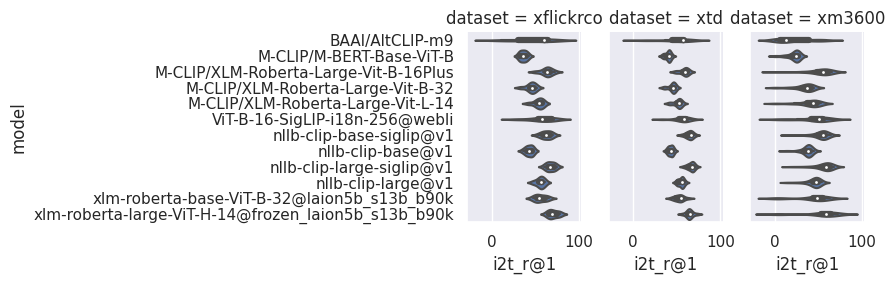

In [27]:
data = []
for _, row in results_xflickrco.sort_values("model").iterrows():
    for lang in xflickrco_languages:
        data.append({
            "model": row["model"],
            "lang": lang,
            "dataset": "xflickrco",
            "i2t_r@1": row[lang]
        })
for _, row in results_xtd.sort_values("model").iterrows():
    for lang in xtd_languages:
        data.append({
            "model": row["model"],
            "lang": lang,
            "dataset": "xtd",
            "i2t_r@1": row[lang]
        })
for _, row in results_xm3600.sort_values("model").iterrows():
    for lang in xm3600_languages:
        data.append({
            "model": row["model"],
            "lang": lang,
            "dataset": "xm3600",
            "i2t_r@1": row[lang]
        })
data = pd.DataFrame.from_dict(data)

g = sns.FacetGrid(data, col="dataset")
g.map(sns.violinplot, "i2t_r@1", "model")
plt.show()

## Observations
* mSigLIP disappoints relative to its Babel-ImageNet results. It's better/on-par with OpenCLIP XLM-R Vit-B32 but outperformed by the only 130M parameter bigger NLLB-SigLIP-base.
* NLLB-SigLIP models are excellent for retrieval despite their poor Babel-ImageNet results. Large competes with OpenCLIP ViT-H on the higher-res languages and crushes it for the low-res languages in XM3600

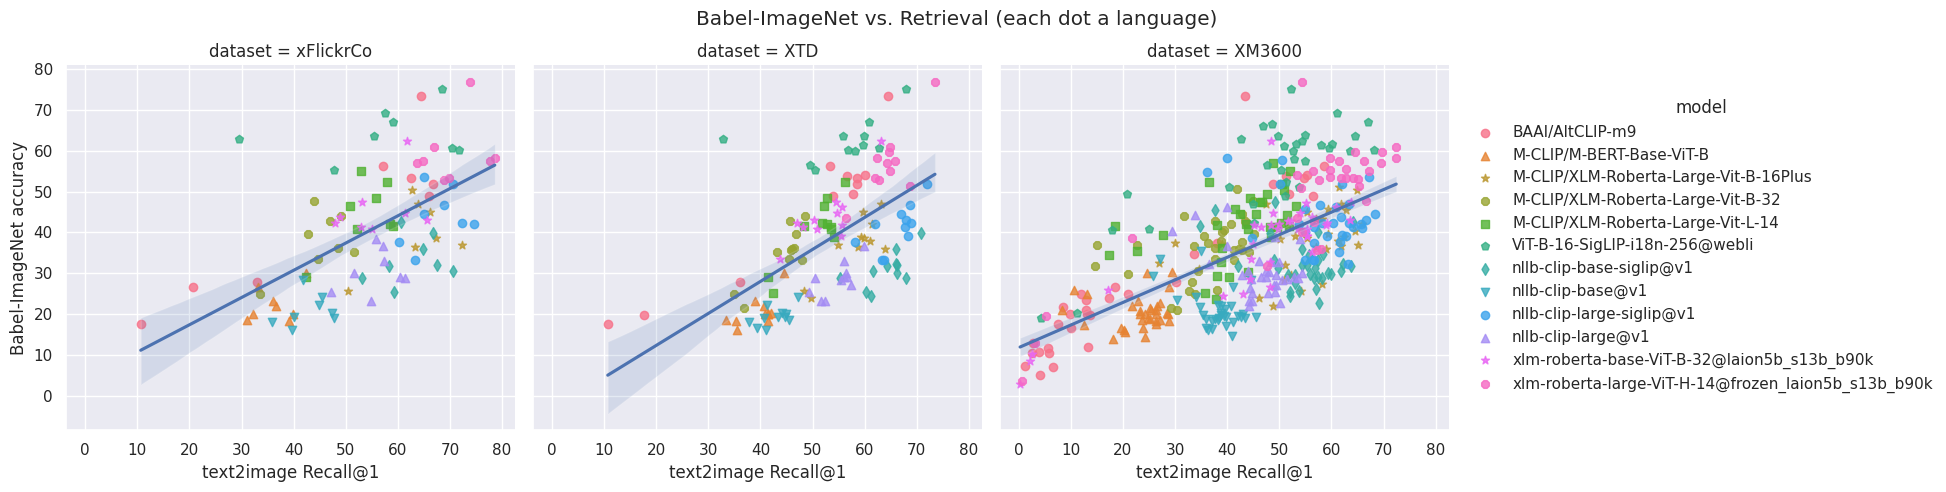

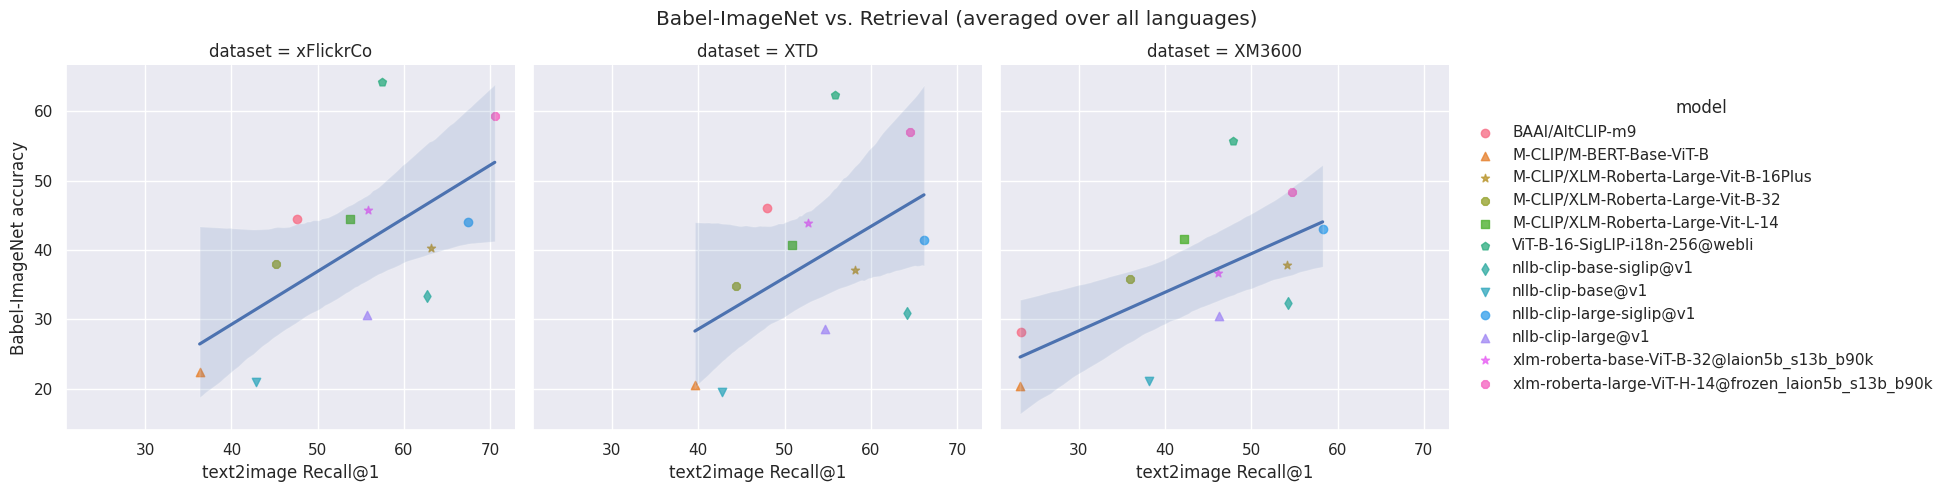

In [28]:
import itertools

data = []
mean_data = []
for( _, row_ret), (_, row_bin) in zip(results_xflickrco.sort_values("model").iterrows(), results.sort_values("model").iterrows()):
    all_class, all_retrieve = [], []
    assert row_bin["model"] == row_ret["model"]
    for lang in xflickrco_languages:
        data.append(
            dict(model=row_bin["model"], dataset="xFlickrCo", lang=lang, retrieval=row_ret[lang], babelimagenet=row_bin[lang]))
        all_retrieve.append(row_ret[lang])
        all_class.append(row_bin[lang])
    # data.append(dict(model=row["model"], dataset="xFlickrCo", lang="EN_orig", mml_in=row["EN_orig"], retrieval=row["en"]))
    mean_data.append(
        dict(model=row_bin["model"], dataset="xFlickrCo", babelimagenet=np.mean(all_class), retrieval=np.mean(all_retrieve)))
    
for( _, row_ret), (_, row_bin) in zip(results_xtd.sort_values("model").iterrows(), results.sort_values("model").iterrows()):
    all_class, all_retrieve = [], []
    assert row_bin["model"] == row_ret["model"]
    for lang in xtd_languages:
        data.append(dict(model=row_bin["model"], lang=lang, dataset="XTD", retrieval=row_ret[lang],
                         babelimagenet=row_bin[lang.replace("JP", "JA")]))
        all_retrieve.append(row_ret[lang])
        all_class.append(row_bin[lang.replace("JP", "JA")])
    mean_data.append(
        dict(model=row_bin["model"], dataset="XTD", babelimagenet=np.mean(all_class), retrieval=np.mean(all_retrieve)))

for( _, row_ret), (_, row_bin) in zip(results_xm3600.sort_values("model").iterrows(), results.sort_values("model").iterrows()):
    all_class, all_retrieve = [], []
    assert row_bin["model"] == row_ret["model"]
    for lang in xm3600_languages:
        if lang == "FIL" or lang == "MI" or lang == "QUZ":
            continue
        data.append(
            dict(model=row_bin["model"], dataset="XM3600", lang=lang, retrieval=row_ret[lang], babelimagenet=row_bin[lang]))
        all_retrieve.append(row_ret[lang])
        all_class.append(row_bin[lang])
    mean_data.append(
        dict(model=row_bin["model"], dataset="XM3600", babelimagenet=np.mean(all_class), retrieval=np.mean(all_retrieve)))
    
data = pd.DataFrame.from_dict(data)
mks = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(mks) for i in data["model"].unique()]

sns.set(font_scale=1.0)
g = sns.lmplot(data=data, x="retrieval", y="babelimagenet", hue="model", col="dataset", markers=markers, fit_reg=False)
for i, ds in enumerate(data["dataset"].unique()):
    sns.regplot(data=data[data["dataset"] == ds], x="retrieval", y="babelimagenet", scatter=False, ax=g.axes[0, i])
    # g.axes[0, i].plot([0, 0.7], [0, 0.7], color="black", linestyle='dashed')
g.set_axis_labels(x_var="text2image Recall@1", y_var="Babel-ImageNet accuracy")
g.fig.subplots_adjust(top=0.87)
g.fig.suptitle("Babel-ImageNet vs. Retrieval (each dot a language)")
# plt.savefig("plots/retrieval_imagenet_correlation.pdf", dpi=100)
plt.show()
sns.set(font_scale=1)

mean_data = pd.DataFrame.from_dict(mean_data)
g = sns.lmplot(data=mean_data, x="retrieval", y="babelimagenet", hue="model", markers=markers, col="dataset",
               fit_reg=False)  #, markers="x", scatter_kws={"linewidth": 4})
for i, ds in enumerate(mean_data["dataset"].unique()):
    sns.regplot(data=mean_data[mean_data["dataset"] == ds], x="retrieval", y="babelimagenet", scatter=False, ax=g.axes[0, i])
    # sns.scatterplot(data=data[data["dataset"]==ds], x="retrieval", y="babelimagenet", hue="model", alpha=0.5, ax=g.axes[0, i], legend=False)
    # g.axes[0, i].plot([0, 0.7], [0, 0.7], color="black", linestyle='dashed')
g.set_axis_labels(x_var="text2image Recall@1", y_var="Babel-ImageNet accuracy")
g.fig.subplots_adjust(top=0.87)
g.fig.suptitle("Babel-ImageNet vs. Retrieval (averaged over all languages)")
# plt.savefig("plots/retrieval_imagenet_mean_correlation.pdf", dpi=100)
plt.show()
sns.set(font_scale=1)


## Babel-ImageNet & Retrieval
* Confirms again findings for SigLIP and NLLB models: they are noticeably better for classification and retrieval, respectively.

**Final recommendation:** 
If you don't know your language and do classification: mSigLIP or NLLB-SigLIP-large (for low-res only)
If you don't know your language and do retrieval: NLLB-SigLIP-large

If you know your language and do classification: Look who performed best on Babel-ImageNet
If you know your language and do retrieval: NLLB-SigLIP-large but also test another model if it is a lot better on Babel-ImageNet